## 1. Análise exploratória de dados

### 1.1. Carregamento e configuração do ambiente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
caminho = '../data/processed/dados_limpos_faixa.csv'
df_analise = pd.read_csv(caminho)


In [30]:
df_analise.columns

Index(['id_estabelecimento_cnes', 'id_procedimento_ambulatorial',
       'ano_atendimento', 'mes_atendimento', 'sexo_paciente',
       'raca_cor_paciente', 'cid_categoria_geral', 'municipio_atendimento',
       'municipio_residencia', 'quantidade_atendimentos',
       'quantidade_aprovada_procedimento', 'faixa_etaria'],
      dtype='object')

## 2. Análise exploratória

In [31]:
df_analise.head()

,id_estabelecimento_cnes,id_procedimento_ambulatorial,ano_atendimento,mes_atendimento,sexo_paciente,raca_cor_paciente,cid_categoria_geral,municipio_atendimento,municipio_residencia,quantidade_atendimentos,quantidade_aprovada_procedimento,faixa_etaria
0,15296,301080208,2014,1,F,branca,F701,Curitiba,Fazenda Rio Grande,1,1,Adolescente (13-18)
1,15296,301080208,2014,1,F,branca,F911,Curitiba,Campo Magro,1,1,Adolescente (13-18)
2,15296,301080208,2014,1,F,parda,F929,Curitiba,Piraquara,1,1,Adolescente (13-18)
3,15296,301080208,2014,1,M,branca,F711,Curitiba,Fazenda Rio Grande,1,1,Adolescente (13-18)
4,15296,301080208,2014,1,M,branca,F840,Curitiba,Colombo,1,1,Adolescente (13-18)


### 2.1. Variação da demanda ao longo dos últimos 10 anos

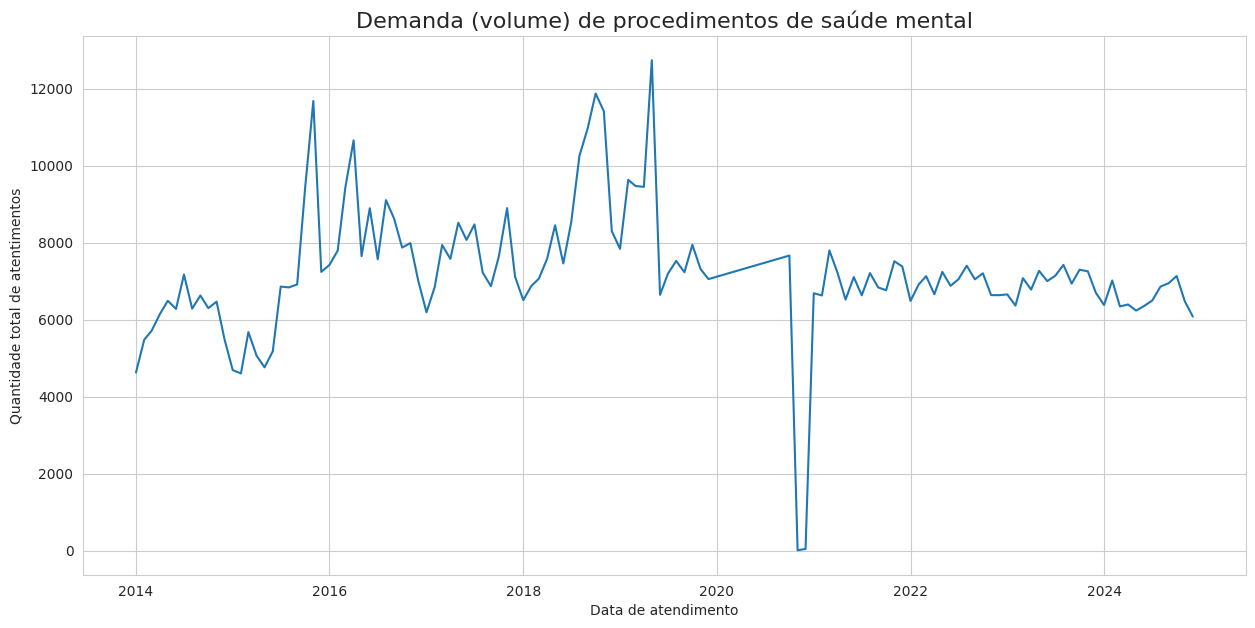

In [32]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

atendimentos_por_mes = df_analise.groupby(['ano_atendimento', 'mes_atendimento'])['quantidade_aprovada_procedimento'].sum().reset_index()
atendimentos_por_mes['data'] = pd.to_datetime(atendimentos_por_mes['ano_atendimento'].astype(str) + '-' + atendimentos_por_mes['mes_atendimento'].astype(str))
sns.lineplot(x='data', y='quantidade_aprovada_procedimento', data=atendimentos_por_mes)
plt.title('Demanda (volume) de procedimentos de saúde mental', fontsize=16)
plt.xlabel('Data de atendimento')
plt.ylabel('Quantidade total de atentimentos')
plt.show()

### 2.2. Análises regionais

/tmp/ipykernel_12110/1947894325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_municipios.values, y=top_15_municipios.index, palette='viridis')


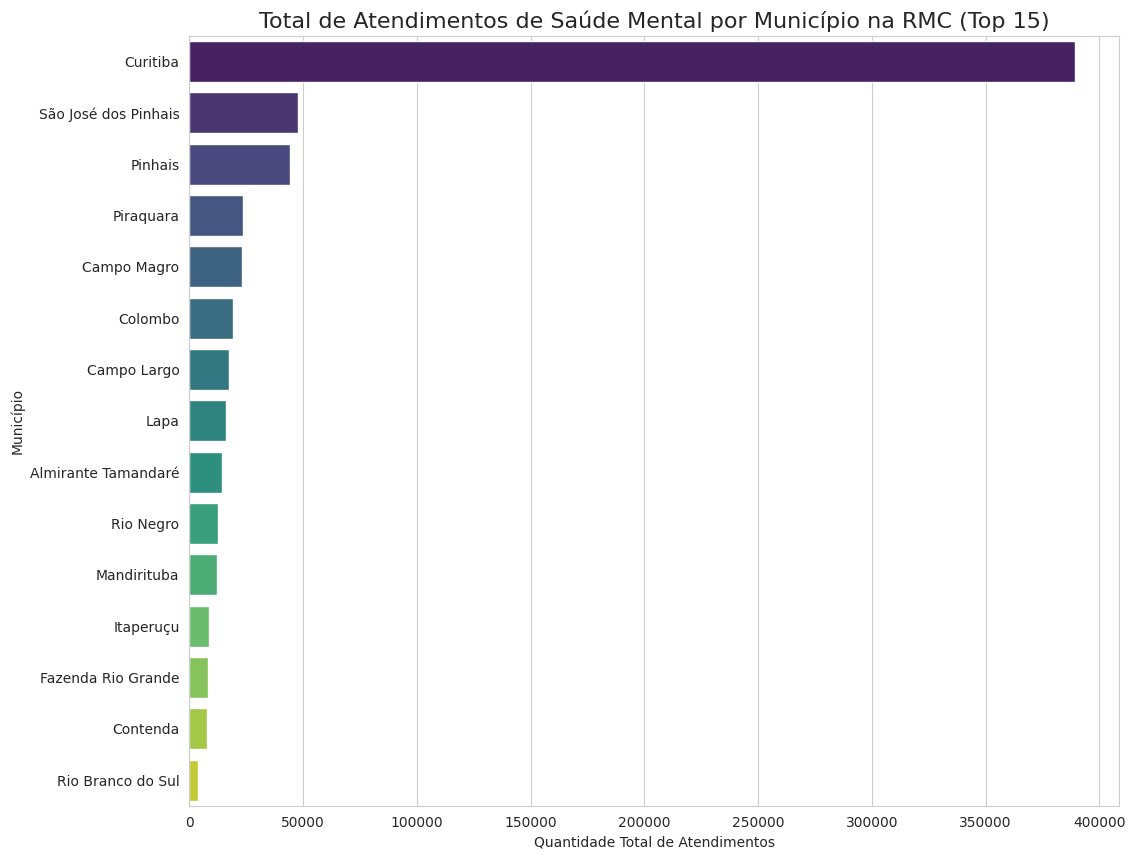

Total de atendimentos por município:
municipio_atendimento
Curitiba                 389287
São José dos Pinhais      47878
Pinhais                   44300
Piraquara                 23470
Campo Magro               23380
Colombo                   19174
Campo Largo               17478
Lapa                      16344
Almirante Tamandaré       14594
Rio Negro                 12654
Mandirituba               12037
Itaperuçu                  8661
Fazenda Rio Grande         8021
Contenda                   7622
Rio Branco do Sul          3648
Quatro Barras              2329
Campina Grande do Sul       527
Name: quantidade_atendimentos, dtype: int64


In [38]:

atendimentos_municipio = df_analise.groupby('municipio_atendimento')['quantidade_atendimentos'].sum().sort_values(ascending=False)

top_15_municipios = atendimentos_municipio.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_15_municipios.values, y=top_15_municipios.index, palette='viridis')

plt.title('Total de Atendimentos de Saúde Mental por Município na RMC (Top 15)', fontsize=16)
plt.xlabel('Quantidade Total de Atendimentos')
plt.ylabel('Município')

plt.show()

print("Total de atendimentos por município:")
print(atendimentos_municipio)

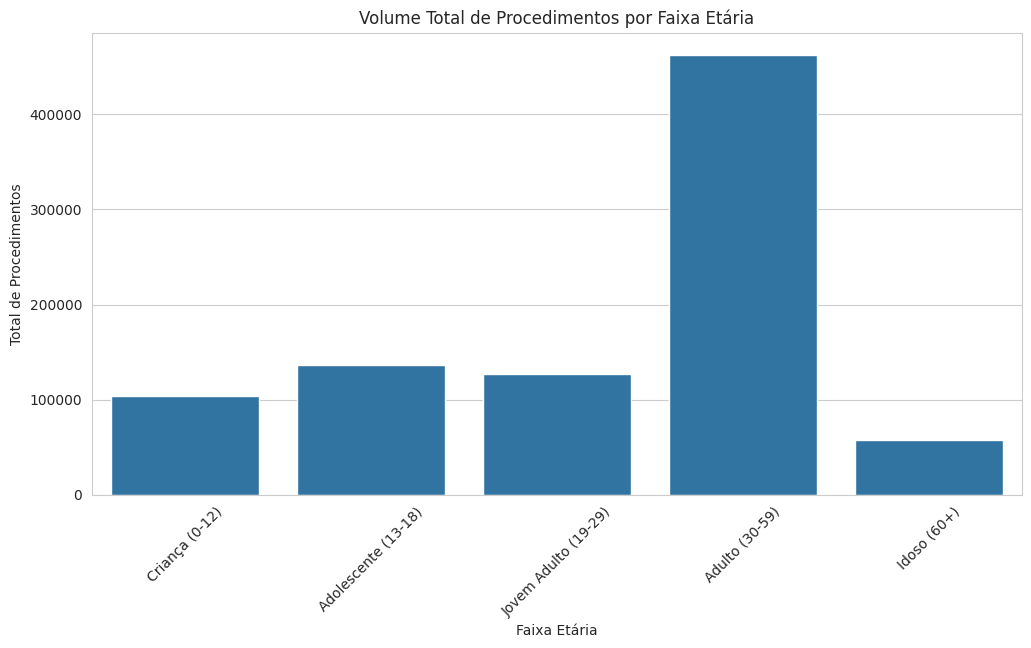

In [39]:
ordem_correta = [
    'Criança (0-12)',
    'Adolescente (13-18)',
    'Jovem Adulto (19-29)',
    'Adulto (30-59)',
    'Idoso (60+)'
]

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_analise, 
    x='faixa_etaria', 
    y='quantidade_aprovada_procedimento', 
    estimator=sum, 
    order=ordem_correta,
    errorbar=None
)

plt.xticks(rotation=45)
plt.title('Volume Total de Procedimentos por Faixa Etária')
plt.ylabel('Total de Procedimentos')
plt.xlabel('Faixa Etária')
plt.show()